In [2]:
import numba
import numpy as np

B = np.array([[0.5, 0.2],
              [0.4, -0.1],
              [0.3, 0.4]])
sigma_F = np.array([[0.02, 0.01],
                  [0.01, 0.03]])
Phi = np.diag([0.05, 0.04, 0.03])

In [3]:
sigma = B @ sigma_F @ B.T + Phi

In [4]:
sigma

array([[0.0582, 0.0037, 0.008 ],
       [0.0037, 0.0427, 0.0025],
       [0.008 , 0.0025, 0.039 ]])

In [5]:
Omega = np.diag([0.0025, 0.0025])
v = np.array([0.06, 0.1])
P = np.diag([1, -1])
v = (0.04)

In [6]:
Sigma = np.array([[0.04, 0.01],[0.01, 0.09]])
shrink_factor = 0.3
target = (np.trace(Sigma)/ 2) * np.eye(2)

cov_shrinked = 0.3 * target + 0.7 * Sigma

In [7]:
import numpy as np

# Data
rets = np.array([
    [0.02, 0.01],
    [-0.01, 0.02],
    [0.03, -0.02]
])

# Sample mean
rets_mean = rets.mean(axis=0)

# Centered
centered = rets - rets_mean

# Sample covariance
T = rets.shape[0]
cov_manual = (centered.T @ centered) / (T - 1)

# Result
print("Sample mean:", rets_mean)
print("Sample covariance:\n", cov_manual)


Sample mean: [0.01333333 0.00333333]
Sample covariance:
 [[ 0.00043333 -0.00036667]
 [-0.00036667  0.00043333]]


In [8]:
cov_manual

array([[ 0.00043333, -0.00036667],
       [-0.00036667,  0.00043333]])

In [9]:
import numpy as np

# Correct shapes
B = np.array([[0.05], [0.07]])  # Shape (2,1)
sigma_f = np.array([[0.04]])    # Shape (1,1)
phi = np.diag([0.01, 0.02])     # Shape (2,2)

# Compute
cov = B @ sigma_f @ B.T + phi

In [10]:
x = np.array([[0.1, -0.1], [-0.05, 0.2]])
sigma_0 = np.array([[0.04, 0], [0, 0.09]])
N = 1
w = N / (x.T @ np.linalg.inv(sigma_0) @ x)

In [11]:
w

array([[ 3.6       , -2.76923077],
       [-2.76923077,  1.44      ]])

In [12]:


x = np.array([[0.1, -0.1],
              [-0.05, 0.2]])
sigma_0 = np.array([[0.04, 0],
                    [0, 0.09]])
N_dim = 2  # because x_t is 2-dimensional!

sigma_inv = np.linalg.inv(sigma_0)

# Compute weights per t
w = []

for t in range(x.shape[0]):
    x_t = x[t, :]  # take one row, shape (2,)
    quad_form = x_t @ sigma_inv @ x_t.T  # scalar
    w_t = N_dim / quad_form
    w.append(w_t)

w = np.array(w)
w

array([5.53846154, 3.94520548])

In [13]:

print("Tyler weights:", w)

Tyler weights: [5.53846154 3.94520548]


In [14]:
6/(6.7)

0.8955223880597015

In [15]:
import sympy as sp
pi, Sigma, P, v, Omega, tau, I = sp.symbols('pi, Sigma, P, v, Omega, tau I')

In [16]:
import sympy as sp
n, k = sp.symbols('n, k', positive = True)
pi = sp.MatrixSymbol('pi', n, 1)
Sigma = sp.MatrixSymbol('Sigma', n, n)
P = sp.MatrixSymbol('P', k, n)
Omega = sp.MatrixSymbol('Omega', k, k)
v = sp.MatrixSymbol('v', k, 1)
I = sp.Identity(n)
tau = sp.symbols('tau')


inv_term = ( (tau * Sigma).inv() + P.T * Omega.inv() * P).inv()

middle_term = (  (tau * Sigma).inv() * pi + P.T* Omega.inv() * v)

mu_BL = inv_term * middle_term
mu_BL

(P.T*Omega**(-1)*P + 1/tau*Sigma**(-1))**(-1)*(P.T*Omega**(-1)*v + 1/tau*Sigma**(-1)*pi)

In [17]:
x = np.array([0.05, -0.1, 0.02])
mu = 0
var = 0.04
v = 4
N = 1

for t in range(3):
    x_t = x[t]
    w_t = (v + N)/ (v + (x_t - mu)**2 / var)

In [18]:
w_t

1.2468827930174564

In [19]:
pi = sp.MatrixSymbol('pi', n, 1)   # n x 1 vector
Sigma = sp.MatrixSymbol('Sigma', n, n)  # n x n covariance matrix
P = sp.MatrixSymbol('P', k, n)  # k views on n assets
Omega = sp.MatrixSymbol('Omega', k, k)  # uncertainty of views
v = sp.MatrixSymbol('v', k, 1)  # view vector
I = sp.Identity(n)  # identity matrix
tau = sp.symbols('tau')


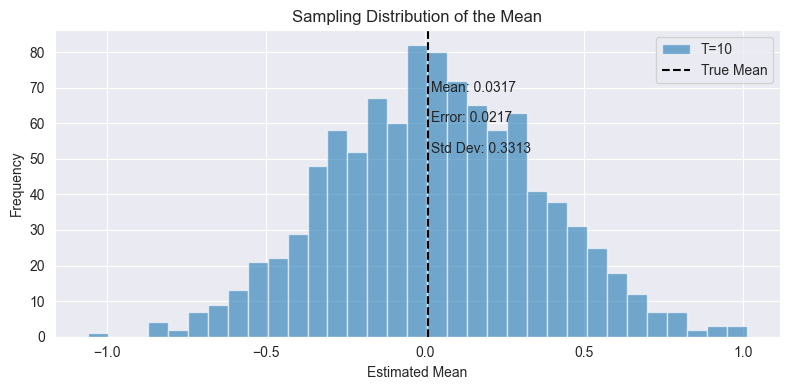

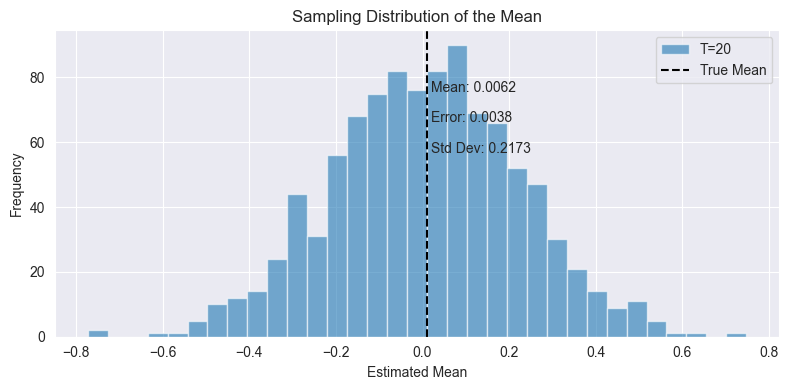

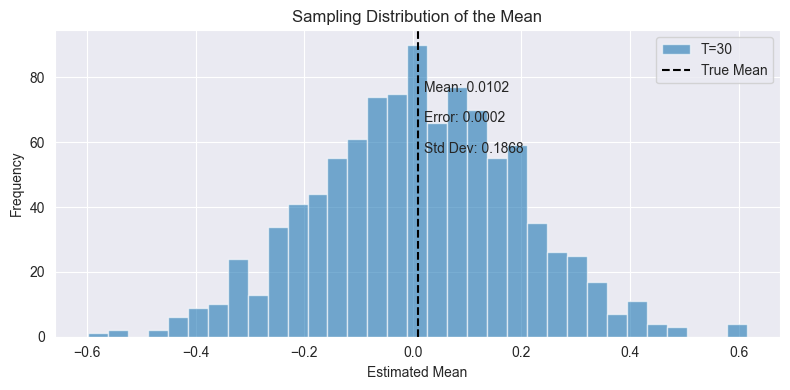

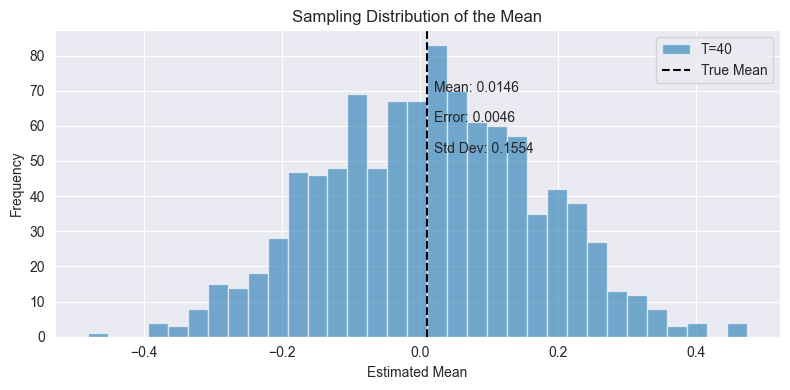

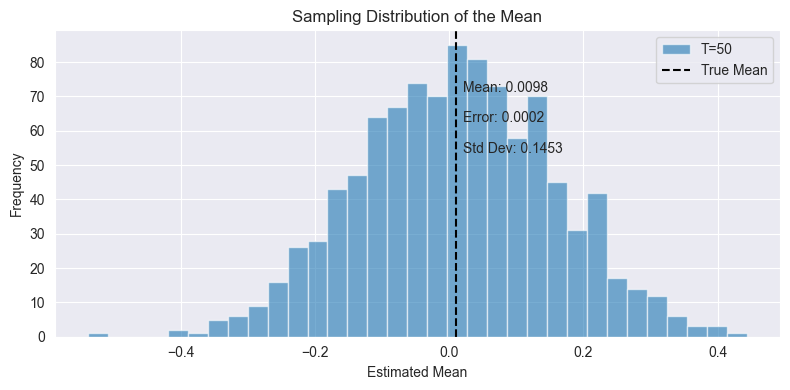

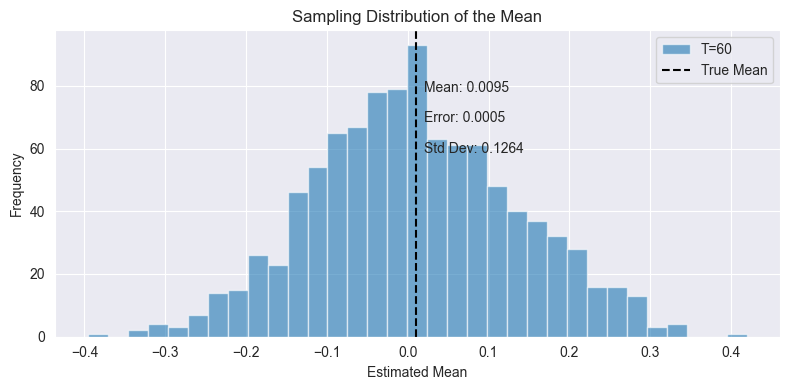

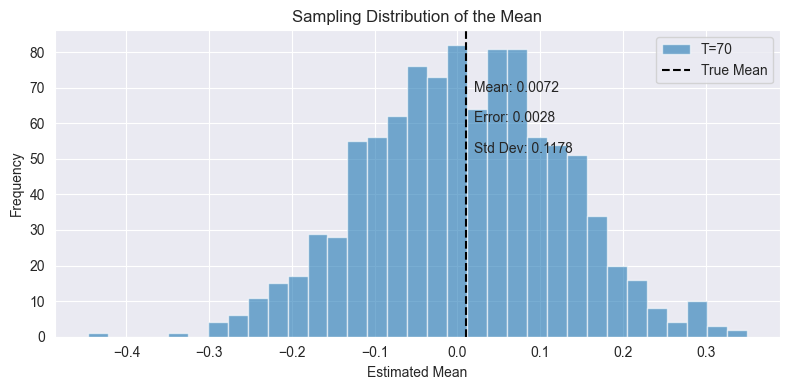

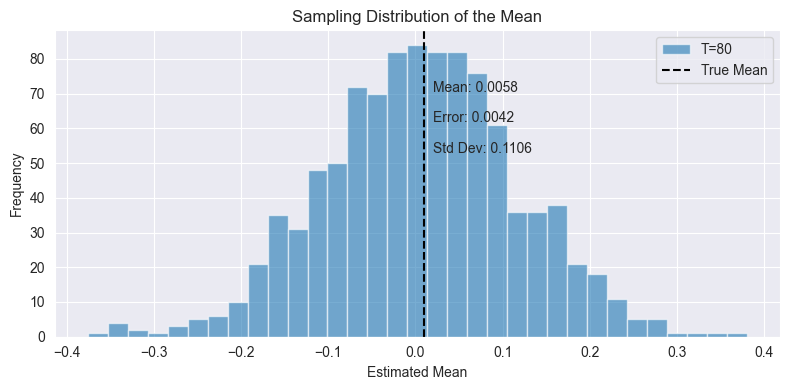

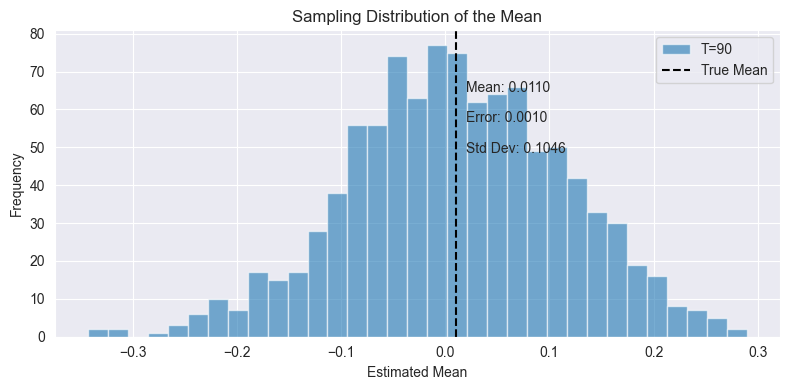

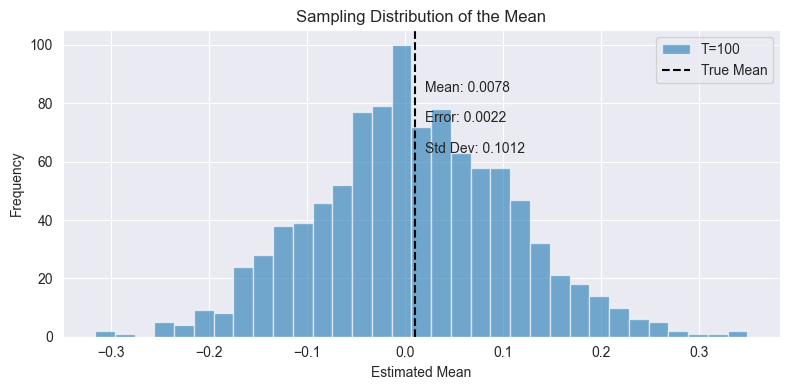

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

M = 1000
T_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
var = 1
mean = 0.01

for T in T_values:
    est_mean = []
    for m in range(M):
        t_points = np.random.normal(mean, np.sqrt(var), size=T)
        est_mean.append(np.mean(t_points))

    sample_std = np.std(est_mean)
    sample_mean = np.mean(est_mean)
    error = abs(sample_mean - mean)

    plt.figure(figsize=(8, 4))
    plt.hist(est_mean, bins=33, alpha=0.6, label=f"T={T}")
    plt.axvline(mean, color='black', linestyle='dashed', label='True Mean')

    # Use text (not annotate) to label in-plot statistics
    plt.text(mean + 0.01, plt.ylim()[1]*0.8, f"Mean: {sample_mean:.4f}")
    plt.text(mean + 0.01, plt.ylim()[1]*0.7, f"Error: {error:.4f}")
    plt.text(mean + 0.01, plt.ylim()[1]*0.6, f"Std Dev: {sample_std:.4f}")

    plt.title("Sampling Distribution of the Mean")
    plt.xlabel("Estimated Mean")
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [23]:
# Task 2 iid normal expected var

x = np.random.normal(0, 1, 10)
mu = x.mean()
T = len(x)
cov = sum((x - mu)*(x - mu))
var = 1/T * var
var = 1/(T+1) * var


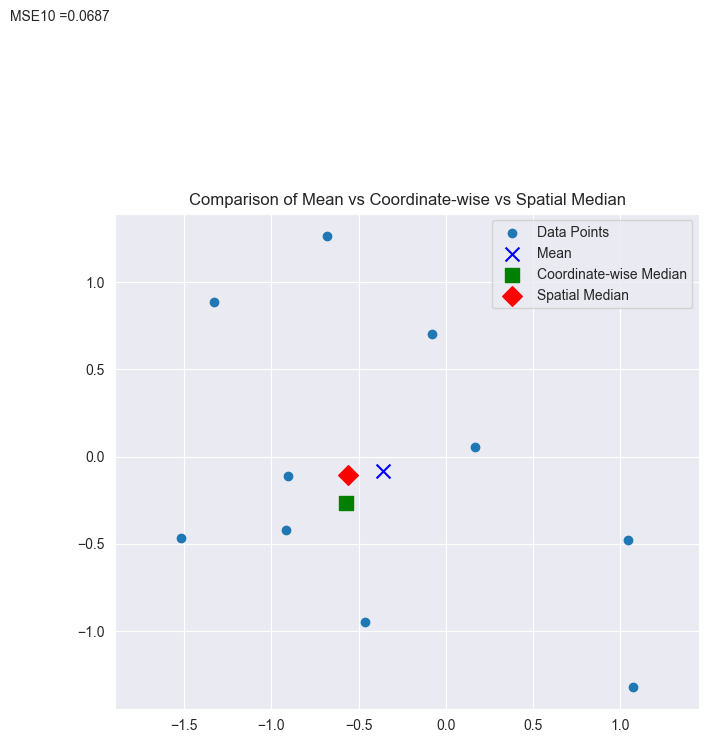

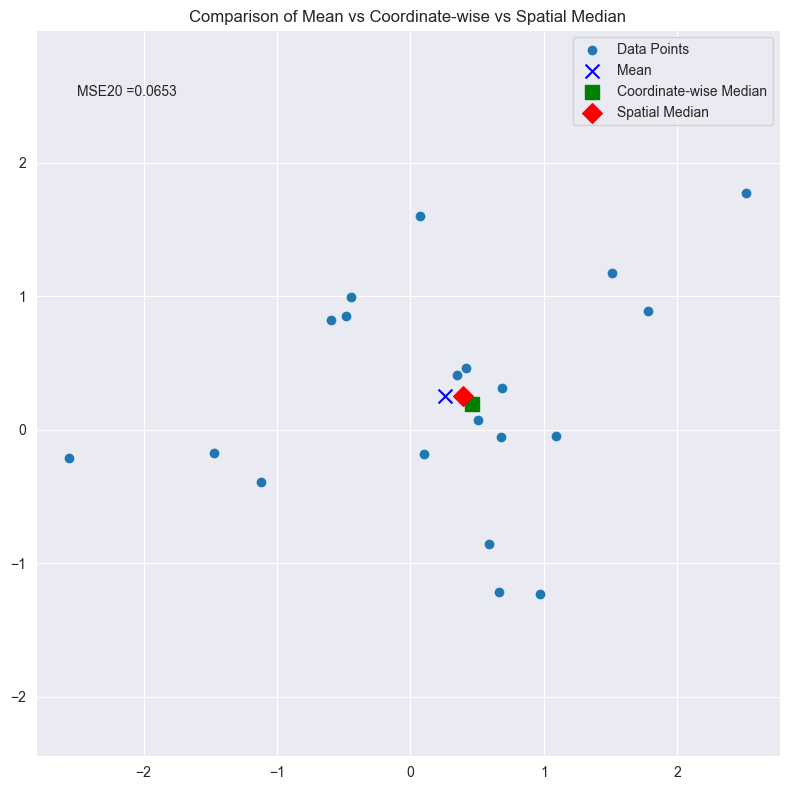

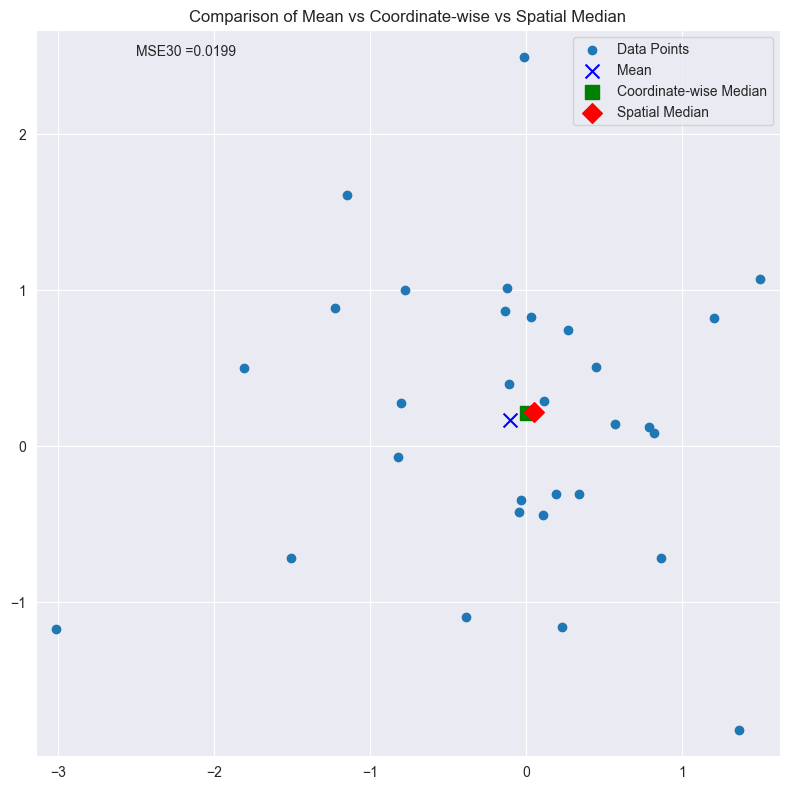

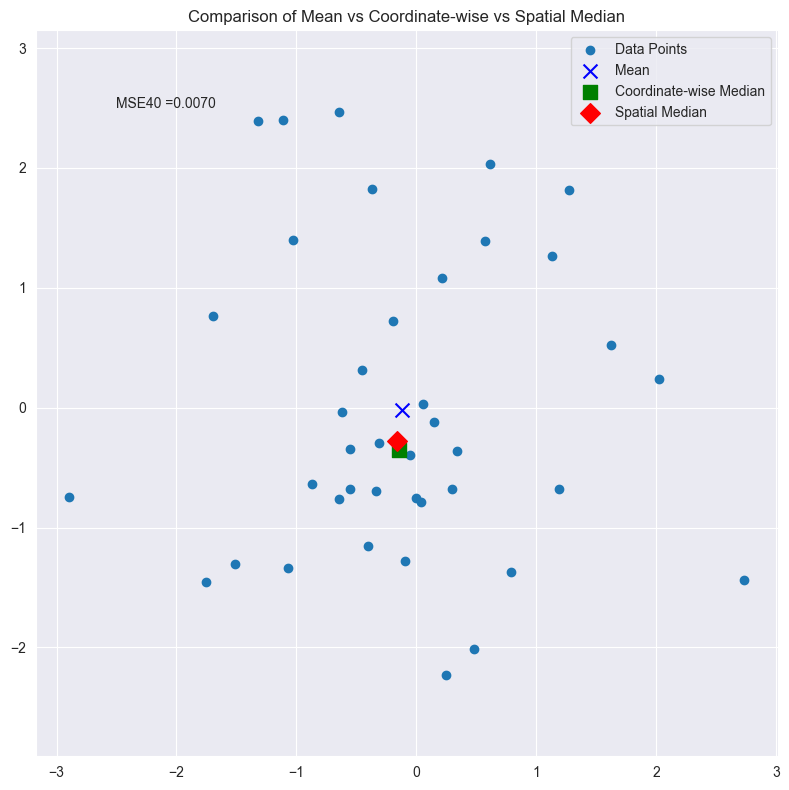

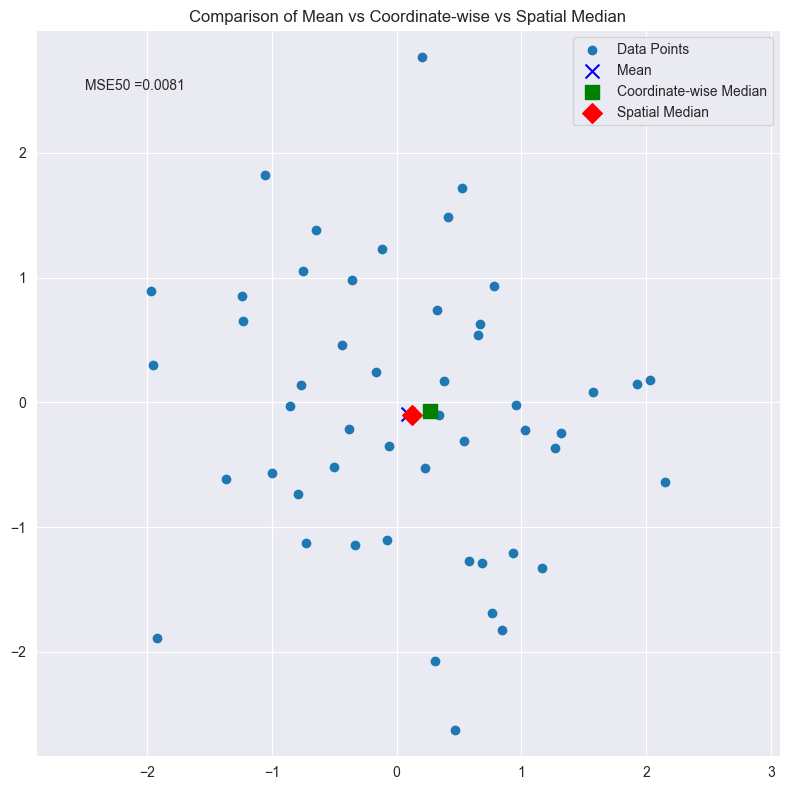

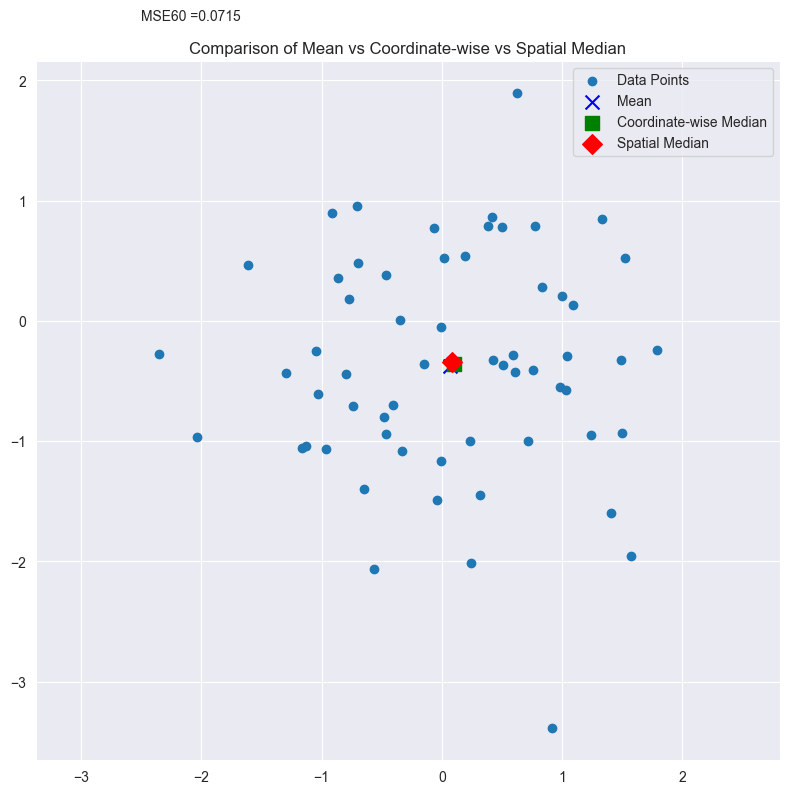

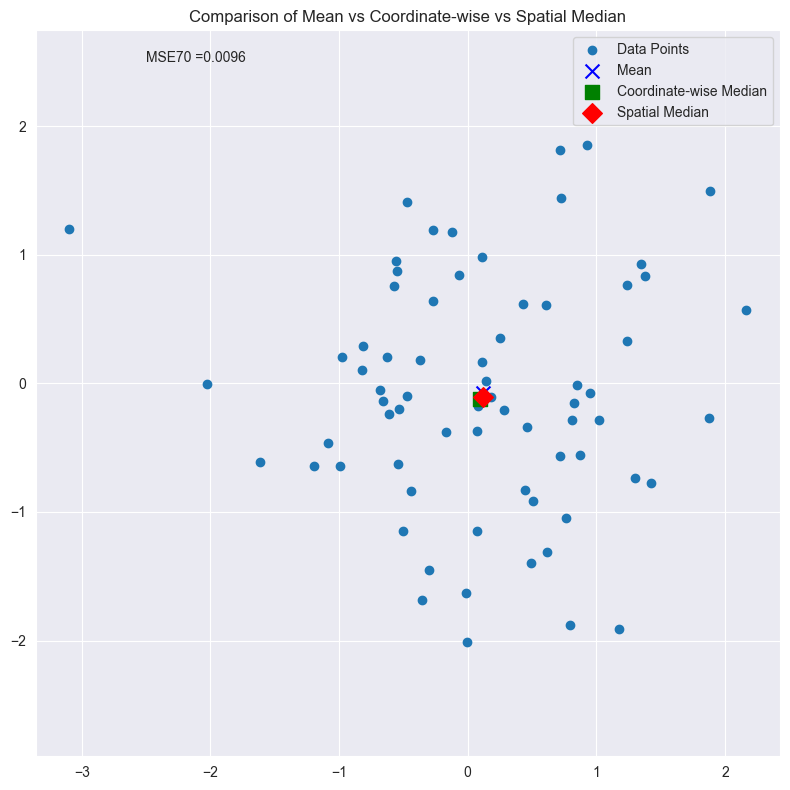

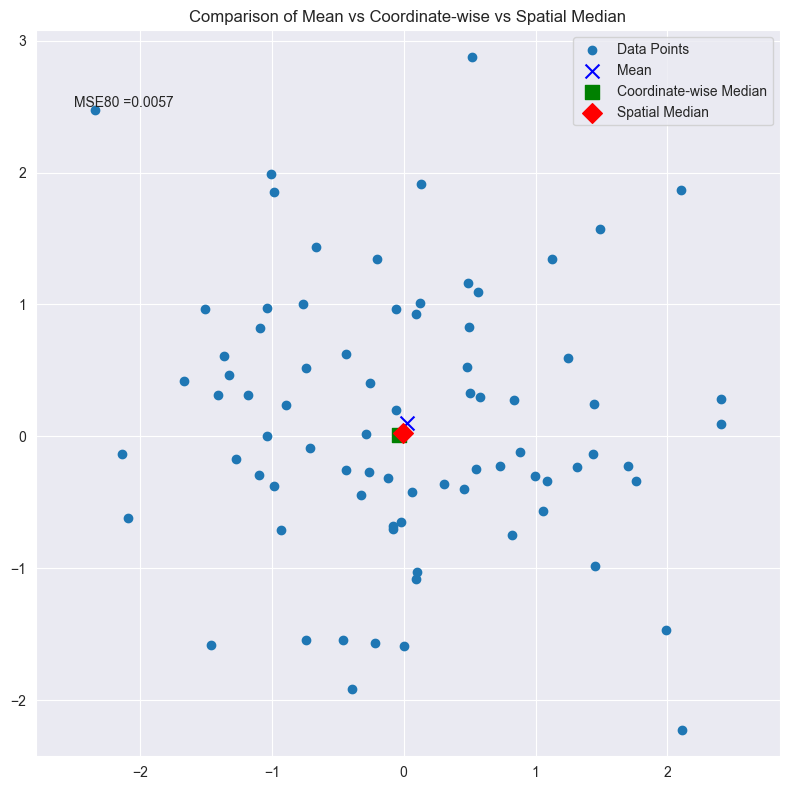

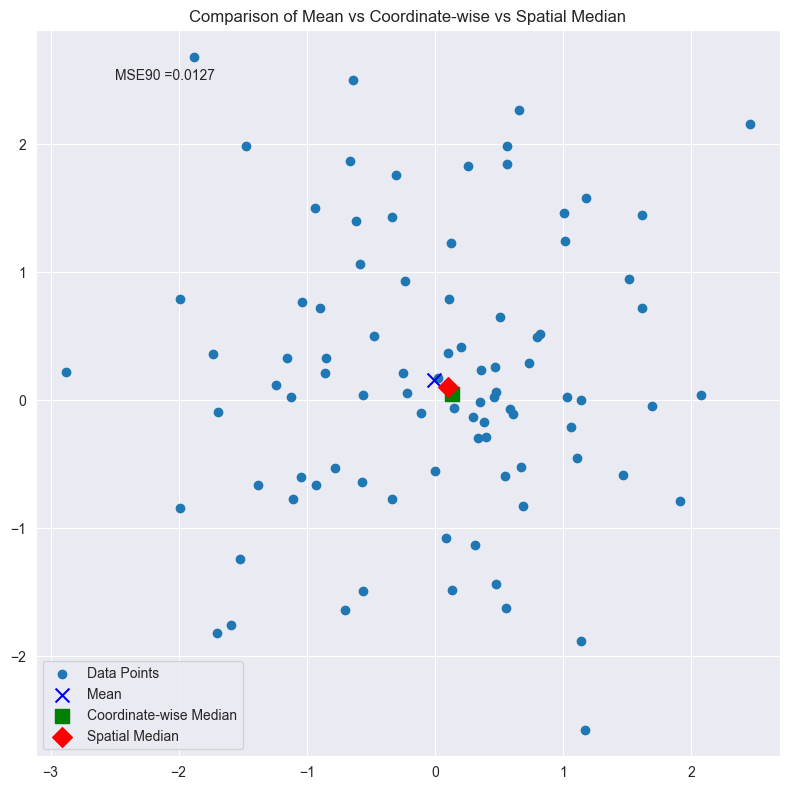

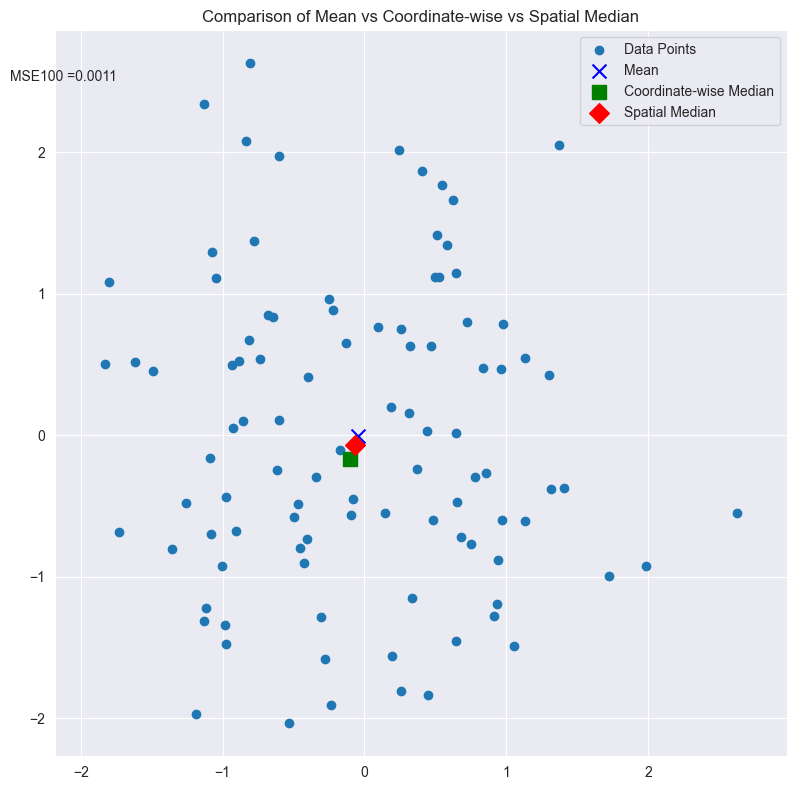

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def spatial_median(X, tol=1e-5, max_iter=500):
    X = np.asarray(X)
    n, d = X.shape

    y = np.median(X, axis=0)

    for _ in range(max_iter):
        distances = np.linalg.norm(X - y, axis=1)
        if np.any(distances == 0):
            return X[distances.argmin()]

        weights = 1 / distances
        y_new = np.average(X, axis=0, weights=weights)

        if np.linalg.norm(y - y_new) < tol:
            return y_new

        y = y_new

    return y
true_mean = 0
# Generate 20 points in 2D
T = np.arange(10, 110, 10)
for t in T:
    X = np.random.normal(true_mean, 1, (t, 2))

# Compute standard mean and medians
    mu = np.mean(X, axis=0)
    median = np.median(X, axis=0)
    sp_median = spatial_median(X)
    mse = np.mean((true_mean - mu)**2)

# Plot
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], label="Data Points")
    plt.scatter(mu[0], mu[1], color='blue', marker='x', s=100, label="Mean")
    plt.scatter(median[0], median[1], color='green', marker='s', s=100, label="Coordinate-wise Median")
    plt.scatter(sp_median[0], sp_median[1], color='red', marker='D', s=100, label="Spatial Median")
    plt.title("Comparison of Mean vs Coordinate-wise vs Spatial Median")
    plt.legend()
    plt.grid(True)
    plt.axis("equal")
    plt.text(-2.5, 2.5, f"MSE{t} ={mse:.4f}")
    plt.tight_layout()
    plt.show()


In [25]:
T = np.arange(0, 100, 10)

In [26]:
T

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

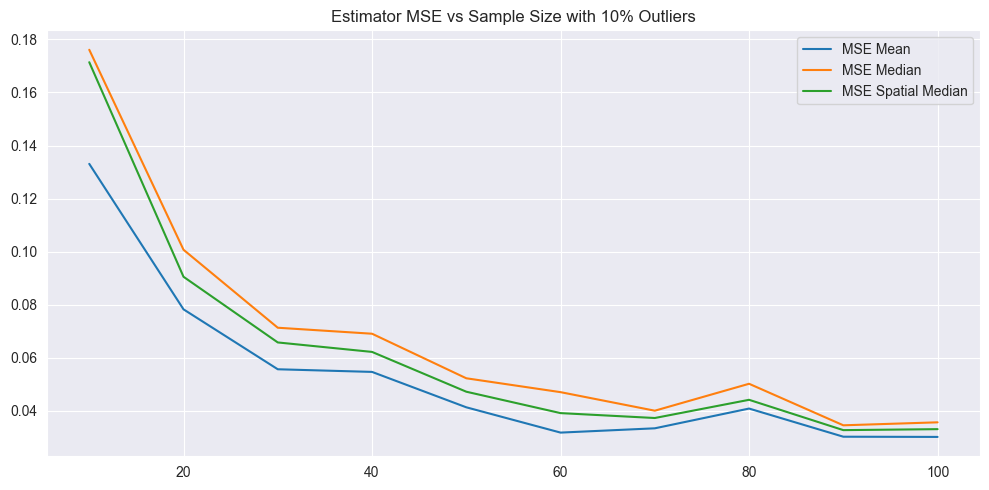

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def spatial_median(X, tol=1e-5, max_iter=500):
    X = np.asarray(X)
    n, d = X.shape
    y = np.median(X, axis=0)

    for _ in range(max_iter):
        distances = np.linalg.norm(X - y, axis=1)
        if np.any(distances == 0):
            return X[distances.argmin()]
        weights = 1 / distances
        y_new = np.average(X, axis=0, weights=weights)
        if np.linalg.norm(y - y_new) < tol:
            return y_new
        y = y_new
    return y

# Settings
T_values = np.arange(10, 110, 10)
true_mean = np.array([0.0, 0.0])
M = 100

mse_mean_list = []
mse_median_list = []
mse_spatial_median_list = []

for T in T_values:
    mse_mean = []
    mse_median = []
    mse_spatial = []

    for _ in range(M):
        # Add 90% normal points and 10% outliers
        n_outliers = int(0.3 * T)
        n_normal = T - n_outliers

        X_normal = np.random.normal(loc=0.0, scale=1.0, size=(n_normal, 2))
        X_outliers = np.random.normal(loc=0.5, scale=1.0, size=(n_outliers, 2))
        X = np.vstack([X_normal, X_outliers])

        # Compute estimators
        mu = np.mean(X, axis=0)
        med = np.median(X, axis=0)
        sp_med = spatial_median(X)


        mse_mean.append(np.mean((mu - true_mean)**2))
        mse_median.append(np.mean((true_mean - med)**2))
        mse_spatial.append(np.mean((sp_med - true_mean)**2))
    mse_mean_list.append(np.mean(mse_mean))
    mse_median_list.append(np.mean(mse_median))
    mse_spatial_median_list.append(np.mean(mse_spatial))

plt.figure(figsize=(10, 5))
plt.plot(T_values, mse_mean_list, label='MSE Mean')
plt.plot(T_values, mse_median_list, label='MSE Median')
plt.plot(T_values, mse_spatial_median_list, label='MSE Spatial Median')

plt.title('Estimator MSE vs Sample Size with 10% Outliers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
from scipy.optimize import minimize
def objective(mu):
    mu = np.array(mu)
    return np.sum(np.linalg.norm(X - mu, axis = 1)**2)
mu0 = np.zeros(2)

result = minimize(objective, mu0)

mu_star = result.x

In [29]:
mu_star

array([0.0587678 , 0.22168661])

In [30]:
def spatial_median(X, tol = 1e-5, max_iter = 500):
    X = np.asarray(X)
    mu = np.median(X, axis =0)

    for _ in range(max_iter):
        distances = np.linalg.norm(X - mu, axis = 1)
        if np.any(distances == 0):
            return X[distances.argmin()] #exect sol

        weights = 1 /distances
        mu_new = np.avarage(X, axis = 0, weights = weights)

        if np.linalg.norm(mu - mu.new) < tol:
            return mu_new
        mu = mu_new
    return mu




In [31]:

N = 10
T = 50
M = 1000
covariances = []
for _ in range(M):
    X = np.random.normal(0, 1, (T, N))
    cov = np.cov(X, rowvar=False)
    covariances.append(cov)

mean_cov = np.mean(covariances, axis = 0)

In [32]:
import numpy as np
from sklearn.covariance import LedoitWolf

# Settings
N = 10
T = 50
M = 1000  # number of experiments
true_cov = np.eye(N)

mse_gauss = []
mse_heavy = []

for _ in range(M):
    # Generate data: T samples of N-dimensional standard normal
    X = np.random.multivariate_normal(mean=np.zeros(N), cov=true_cov, size=T)

    # Gaussian MLE: bias=True => divide by T
    cov_gauss = np.cov(X, rowvar=False, bias=True)

    # Heavy-tailed/robust estimator: Ledoit-Wolf shrinkage
    cov_heavy = LedoitWolf().fit(X).covariance_

    # MSE vs true identity covariance
    mse_gauss.append(np.mean((cov_gauss - true_cov)**2))
    mse_heavy.append(np.mean((cov_heavy - true_cov)**2))

# Final average MSEs
print(f"Mean MSE (Gaussian MLE):     {np.mean(mse_gauss):.6f}")
print(f"Mean MSE (Heavy-Tailed Est): {np.mean(mse_heavy):.6f}")


Mean MSE (Gaussian MLE):     0.021636
Mean MSE (Heavy-Tailed Est): 0.000794


In [33]:
import numpy as np
from sklearn.covariance import LedoitWolf

# Function to generate multivariate t-distribution
def multivariate_t(mean, cov, df, size):
    d = len(mean)
    g = np.random.gamma(df / 2., 2. / df, size=(size, 1))
    Z = np.random.multivariate_normal(np.zeros(d), cov, size=size)
    return mean + Z / np.sqrt(g)

# Settings
N = 10
T = 50
M = 1000
true_cov = np.eye(N)
df = 3  # degrees of freedom for t-distribution

mse_gauss = []
mse_heavy = []

for _ in range(M):
    # Generate heavy-tailed data (t-distribution)
    X = multivariate_t(mean=np.zeros(N), cov=true_cov, df=df, size=T)

    # Gaussian MLE (biased estimator)
    cov_gauss = np.cov(X, rowvar=False, bias=True)

    # Heavy-tailed estimator: Ledoit-Wolf shrinkage
    cov_heavy = LedoitWolf().fit(X).covariance_

    # MSE vs identity matrix
    mse_gauss.append(np.mean((cov_gauss - true_cov) ** 2))
    mse_heavy.append(np.mean((cov_heavy - true_cov) ** 2))

# Output
print(f"Mean MSE (Gaussian MLE):     {np.mean(mse_gauss):.6f}")
print(f"Mean MSE (Heavy-Tailed Est): {np.mean(mse_heavy):.6f}")


Mean MSE (Gaussian MLE):     3.503903
Mean MSE (Heavy-Tailed Est): 0.633488


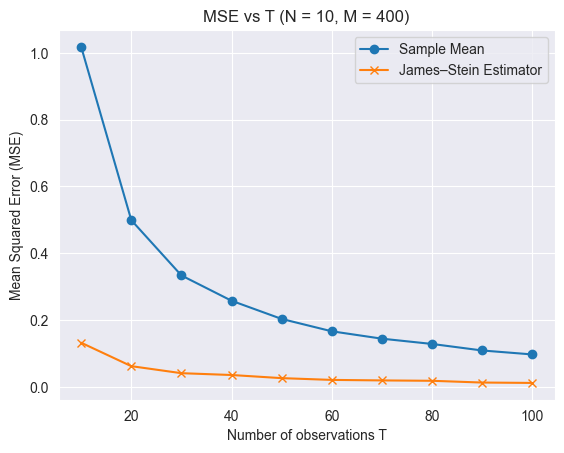

In [84]:
import numpy as np
import matplotlib.pyplot as plt

M = 400         # Monte Carlo trials
N = 10          # Dimension
T_space = np.arange(10, 110, 10)  # T values: [10, 20, ..., 100]

mse_sample = []
mse_js = []

for T in T_space:
    sample_means = np.zeros((M, N))
    js_means = np.zeros((M, N))

    for i in range(M):
        X = np.random.normal(0, 1, (T, N))
        x_bar = X.mean(axis=0)

        norm_sq = np.sum(x_bar**2)
        shrinkage_factor = 1 - (N - 2) / (T * norm_sq)

        mu_js = shrinkage_factor * x_bar if shrinkage_factor > 0 else np.zeros_like(x_bar)

        sample_means[i] = x_bar
        js_means[i] = mu_js

    # Ground truth mean is 0, so MSE is just mean squared norm
    mse_sample.append(np.mean(np.sum(sample_means**2, axis=1)))
    mse_js.append(np.mean(np.sum(js_means**2, axis=1)))

# Plot
plt.plot(T_space, mse_sample, label="Sample Mean", marker='o')
plt.plot(T_space, mse_js, label="James–Stein Estimator", marker='x')
plt.xlabel("Number of observations T")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs T (N = 10, M = 400)")
plt.legend()
plt.grid(True)
plt.show()


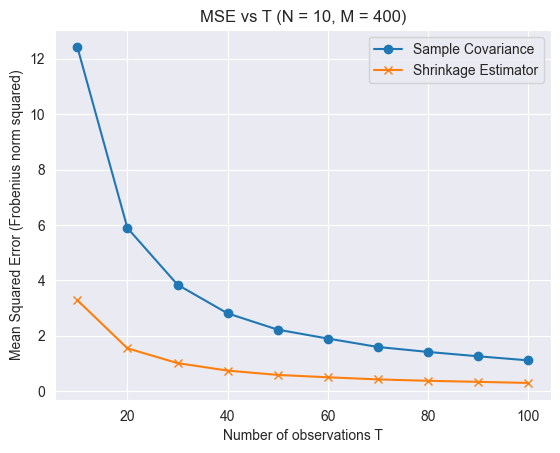

In [105]:
import numpy as np
import matplotlib.pyplot as plt

M = 400         # Monte Carlo trials
N = 10          # Dimension
T_space = np.arange(10, 110, 10)  # T values: [10, 20, ..., 100]

mse_sample = []
mse_shrink = []

for T in T_space:
    errors_sample = []
    errors_shrink = []

    for i in range(M):
        X = np.random.normal(0, 1, (T, N))

        # Sample covariance
        S = np.cov(X, rowvar=False)

        # Shrinkage target
        avg_var = np.trace(S) / N
        F = np.eye(N) * avg_var

        delta = 0.5  # Fixed shrinkage intensity
        S_shrink = (1 - delta) * S + delta * F

        # True covariance is identity
        true_cov = np.eye(N)

        # Compute Frobenius norm squared of the error matrix (MSE)
        err_sample = np.linalg.norm(S - true_cov, ord='fro')**2
        err_shrink = np.linalg.norm(S_shrink - true_cov, ord='fro')**2

        errors_sample.append(err_sample)
        errors_shrink.append(err_shrink)

    # Average errors over M runs
    mse_sample.append(np.mean(errors_sample))
    mse_shrink.append(np.mean(errors_shrink))

# Plot
plt.plot(T_space, mse_sample, label="Sample Covariance", marker='o')
plt.plot(T_space, mse_shrink, label="Shrinkage Estimator", marker='x')
plt.xlabel("Number of observations T")
plt.ylabel("Mean Squared Error (Frobenius norm squared)")
plt.title("MSE vs T (N = 10, M = 400)")
plt.legend()
plt.grid(True)
plt.show()


In [103]:
N = 10
T = 20
X = np.random.normal(0, 1, (T, N))
S = np.cov(X, rowvar = False)
delta = 0.5

avg_var = np.trace(S) / N
F = np.eye(N) * avg_var

S*(1 - delta) + F*(delta)


array([[ 1.04618308,  0.05041028,  0.05090907, -0.19501782,  0.08161768,
         0.07265022,  0.0240222 , -0.12579071, -0.03242014, -0.21986404],
       [ 0.05041028,  0.92952041,  0.1061676 ,  0.03718309, -0.0601331 ,
         0.03422506, -0.07322283,  0.01011541, -0.1640746 ,  0.02598458],
       [ 0.05090907,  0.1061676 ,  0.95069048,  0.1498757 , -0.12233341,
         0.36691805, -0.02303574,  0.13402382, -0.09490138, -0.00913105],
       [-0.19501782,  0.03718309,  0.1498757 ,  0.93940817, -0.08130693,
         0.12860864,  0.00694088,  0.04318991, -0.11932139, -0.00188724],
       [ 0.08161768, -0.0601331 , -0.12233341, -0.08130693,  0.85273347,
        -0.11225713, -0.07879881, -0.15663966,  0.13416544, -0.05006619],
       [ 0.07265022,  0.03422506,  0.36691805,  0.12860864, -0.11225713,
         1.05858988, -0.02081585,  0.01763913, -0.05819797, -0.10954137],
       [ 0.0240222 , -0.07322283, -0.02303574,  0.00694088, -0.07879881,
        -0.02081585,  0.84669206, -0.15513736

In [107]:
N = 10
T = 20

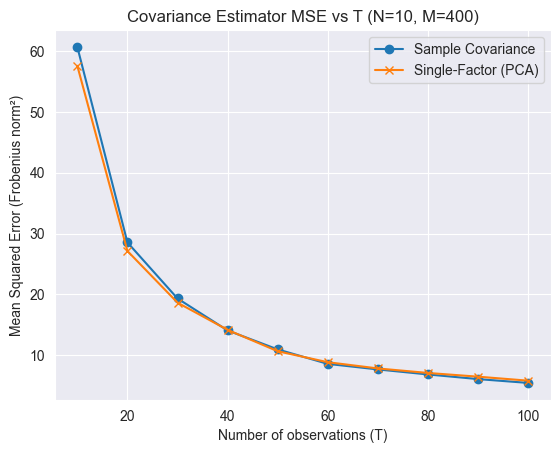

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
N = 10
M = 400  # number of trials per T
T_values = np.arange(10, 110, 10)

mse_sample_all = []
mse_factor_all = []

for T in T_values:
    mse_sample = []
    mse_factor = []

    for _ in range(M):
        # Generate data
        beta = np.ones(N)  # β vector
        f = np.random.normal(0, 1, T)  # common factor
        eps = np.random.normal(0, 1, (T, N))  # noise
        X = f[:, None] * beta + eps  # shape (T, N)

        # True covariance: ββᵀ + I
        Sigma_true = np.outer(beta, beta) + np.eye(N)

        # === Sample covariance ===
        S_sample = np.cov(X, rowvar=False)
        err_sample = np.linalg.norm(S_sample - Sigma_true, ord='fro')**2
        mse_sample.append(err_sample)

        # === PCA-based 1-factor estimate ===
        eigvals, eigvecs = np.linalg.eigh(S_sample)
        idx = np.argsort(eigvals)[::-1]
        eigvals = eigvals[idx]
        eigvecs = eigvecs[:, idx]

        lambda1 = eigvals[0]
        v1 = eigvecs[:, 0]
        sigma2_hat = np.mean(eigvals[1:])
        S_factor = lambda1 * np.outer(v1, v1) + sigma2_hat * np.eye(N)

        err_factor = np.linalg.norm(S_factor - Sigma_true, ord='fro')**2
        mse_factor.append(err_factor)

    # Store average MSEs
    mse_sample_all.append(np.mean(mse_sample))
    mse_factor_all.append(np.mean(mse_factor))

# === Plotting ===
plt.plot(T_values, mse_sample_all, marker='o', label='Sample Covariance')
plt.plot(T_values, mse_factor_all, marker='x', label='Single-Factor (PCA)')
plt.xlabel("Number of observations (T)")
plt.ylabel("Mean Squared Error (Frobenius norm²)")
plt.title("Covariance Estimator MSE vs T (N=10, M=400)")
plt.legend()
plt.grid(True)
plt.show()


In [128]:
S_factor

array([[0.92517213, 0.06391367, 0.04488916, 0.04470043, 0.09492156,
        0.06305574, 0.06232512, 0.06546549, 0.03592253, 0.06258164],
       [0.06391367, 1.71131558, 0.55576618, 0.5534295 , 1.17520988,
        0.78068394, 0.77163823, 0.81051869, 0.44475159, 0.77481412],
       [0.04488916, 0.55576618, 1.310347  , 0.38869602, 0.82539764,
        0.54830605, 0.54195288, 0.56926021, 0.31236711, 0.54418343],
       [0.04470043, 0.5534295 , 0.38869602, 1.30707162, 0.82192732,
        0.54600074, 0.53967429, 0.5668668 , 0.31105379, 0.54189546],
       [0.09492156, 1.17520988, 0.82539764, 0.82192732, 2.66537597,
        1.15943487, 1.14600062, 1.20374403, 0.66052403, 1.15071728],
       [0.06305574, 0.78068394, 0.54830605, 0.54600074, 1.15943487,
        1.69021454, 0.76128043, 0.79963898, 0.43878163, 0.76441368],
       [0.06232512, 0.77163823, 0.54195288, 0.53967429, 1.14600062,
        0.76128043, 1.67246938, 0.79037365, 0.43369751, 0.75555649],
       [0.06546549, 0.81051869, 0.5692602